In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
from specific_func import downloading_json_file, split_json_to_dfs
import numpy as np

In [2]:
covid_json = "https://covid.ourworldindata.org/data/owid-covid-data.json"
response = downloading_json_file(covid_json)

In [3]:
country_information, country_key, combined_df = split_json_to_dfs(response)

,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,location,continent
0,2019-12-31,0.0,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Asia
1,2020-01-01,0.0,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Asia
2,2020-01-02,0.0,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Asia
3,2020-01-03,0.0,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Asia
4,2020-01-04,0.0,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57066,2020-11-13,646281.0,9114.0,82.912,1.169,NaN,581001.571,8492.286,74.537,1.089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,NaN
57067,2020-11-14,628760.0,9940.0,80.664,1.275,NaN,584253.714,8673.714,74.954,1.113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,NaN
57068,2020-11-15,590843.0,8906.0,75.800,1.143,NaN,583899.429,8883.000,74.909,1.140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,NaN
57069,2020-11-16,500555.0,6449.0,64.217,0.827,NaN,579871.143,8908.429,74.392,1.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,NaN


In [6]:
drop_option = country_key['location'].to_list()

In [7]:
today = combined_df['date'].max()
print("Data last updated: {}".format(str(today.date())))

Data last updated: 2020-11-17


In [10]:
combined_df[combined_df['date'] == today][['date', 'total_cases', 'country_code']].head()

,date,total_cases,country_code
322,2020-11-17,43468.0,AFG
576,2020-11-17,28432.0,ALB
899,2020-11-17,68589.0,DZA
1154,2020-11-17,5914.0,AND
1395,2020-11-17,13451.0,AGO


In [14]:
combined_df[['location', 'total_cases']]

,location,total_cases
0,Afghanistan,NaN
1,Afghanistan,NaN
2,Afghanistan,NaN
3,Afghanistan,NaN
4,Afghanistan,NaN
...,...,...
57066,World,52896469.0
57067,World,53525229.0
57068,World,54116072.0
57069,World,54616627.0


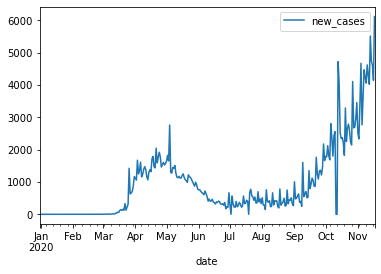

In [30]:
country_select = "Canada"
combined_df[combined_df.location == country_select].plot('date', 'new_cases')
plt.show()

In [31]:
combined_df[combined_df['new_cases'] < 0].head()

,date,location,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,...,new_tests_per_thousand,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,continent
5690,2020-05-20,Benin,-209.0,0.0,-17.240,0.000,57.41,-28.143,0.000,-2.321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
15435,2020-05-07,Ecuador,-2461.0,49.0,-139.488,2.777,86.11,677.857,105.000,38.421,...,0.085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South America
15437,2020-05-09,Ecuador,-1480.0,50.0,-83.886,2.834,86.11,354.571,91.571,20.097,...,0.049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South America
15440,2020-05-12,Ecuador,-50.0,18.0,-2.834,1.020,86.11,-338.857,82.286,-19.206,...,0.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South America
15558,2020-09-07,Ecuador,-8261.0,3800.0,-468.229,215.382,70.83,-552.000,567.000,-31.287,...,0.042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South America


In [32]:
combined_df['new_cases'] = np.where(combined_df['new_cases'] <0, None, combined_df['new_cases'])

In [33]:
combined_df[combined_df['new_cases'] < 0].head()

,date,location,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,...,new_tests_per_thousand,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,continent


In [35]:
combined_df.columns.to_list()

['date',
 'location',
 'new_cases',
 'new_deaths',
 'new_cases_per_million',
 'new_deaths_per_million',
 'stringency_index',
 'new_cases_smoothed',
 'new_deaths_smoothed',
 'new_cases_smoothed_per_million',
 'new_deaths_smoothed_per_million',
 'total_cases',
 'total_cases_per_million',
 'total_deaths',
 'total_deaths_per_million',
 'reproduction_rate',
 'total_tests',
 'total_tests_per_thousand',
 'tests_units',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'new_tests',
 'new_tests_per_thousand',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'continent']